In [45]:
import pandas as pd
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [46]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [50]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [51]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [52]:
410/508

0.8070866141732284

In [53]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
dfle=df
dfle.Sex=le.fit_transform(dfle.Sex)
dfle.ChestPainType=le.fit_transform(dfle.ChestPainType)
dfle.RestingECG	=le.fit_transform(dfle.RestingECG)
dfle.ExerciseAngina=le.fit_transform(dfle.ExerciseAngina)
dfle.ST_Slope=le.fit_transform(dfle.ST_Slope)

In [56]:
dfle.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [57]:
upper=dfle.RestingBP.mean()+3*dfle.RestingBP.std()
lower=dfle.RestingBP.mean()-3*dfle.RestingBP.std()
dfle=dfle[(dfle.RestingBP<upper)&(dfle.RestingBP>lower)]

In [58]:
upper=dfle.Cholesterol.mean()+3*dfle.Cholesterol.std()
lower=dfle.Cholesterol.mean()-3*dfle.Cholesterol.std()
dfle=dfle[(dfle.Cholesterol<upper)&(dfle.Cholesterol>lower)]

In [59]:
upper=dfle.MaxHR.mean()+3*dfle.MaxHR.std()
lower=dfle.MaxHR.mean()-3*dfle.MaxHR.std()
dfle=dfle[(dfle.MaxHR<upper)&(dfle.MaxHR>lower)]

In [60]:
upper=dfle.Oldpeak.mean()+3*dfle.Oldpeak.std()
lower=dfle.Oldpeak.mean()-3*dfle.Oldpeak.std()
dfle=dfle[(dfle.Oldpeak<upper)&(dfle.Oldpeak>lower)]

In [61]:
dfle.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.497219,0.789766,0.785317,132.027809,198.005562,0.232481,0.991101,136.917686,0.403782,0.861513,1.373749,0.547275
std,9.456073,0.407701,0.956496,17.120895,107.157779,0.422649,0.629569,25.356740,0.490928,1.007626,0.601057,0.498037
min,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,63.000000,0.000000,-2.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,174.500000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,222.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,266.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,185.000000,518.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,1.000000


In [62]:
dfle.shape

(899, 12)

In [63]:
x=dfle.drop('HeartDisease',axis=1)
y=dfle.HeartDisease

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x);
x_scaled[0:5]

array([[-1.42815446,  0.515943  ,  0.2245723 ,  0.46590022,  0.84963584,
        -0.5503622 ,  0.01414258,  1.38431998, -0.8229452 , -0.85546862,
         1.04249607],
       [-0.47585532, -1.93819859,  1.27063705,  1.63471366, -0.16812204,
        -0.5503622 ,  0.01414258,  0.7529728 , -0.8229452 ,  0.13751561,
        -0.62216462],
       [-1.7455875 ,  0.515943  ,  0.2245723 , -0.1185065 ,  0.79361247,
        -0.5503622 ,  1.60341473, -1.53566071, -0.8229452 , -0.85546862,
         1.04249607],
       [-0.58166634, -1.93819859, -0.82149245,  0.34901888,  0.14934372,
        -0.5503622 ,  0.01414258, -1.14106873,  1.21514774,  0.63400773,
        -0.62216462],
       [ 0.05319975,  0.515943  ,  1.27063705,  1.05030694, -0.02806362,
        -0.5503622 ,  0.01414258, -0.58863995, -0.8229452 , -0.85546862,
         1.04249607]])

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,stratify=y,random_state=5)

In [66]:
y_train.value_counts()

HeartDisease
1    369
0    305
Name: count, dtype: int64

In [67]:
307/381

0.8057742782152231

In [68]:
x_train.shape

(674, 11)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTreeClassifier(),x_scaled,y,cv=5)
scores.mean()

0.7395779019242706

In [70]:
from sklearn.svm import SVC
scores=cross_val_score(SVC(C=1,kernel='linear'),x_scaled,y,cv=5)
scores.mean()

0.8119366852886406

In [71]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(
    estimator=SVC(C=1,kernel='linear'),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train,y_train)
bag_model.oob_score_

0.8545994065281899

In [72]:
bag_model.score(x_test,y_test)

0.8577777777777778

In [73]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(x_train,y_train)
bag_model.oob_score_

0.8753709198813057

In [74]:
y_predicted=bag_model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 84,  18],
       [ 15, 108]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

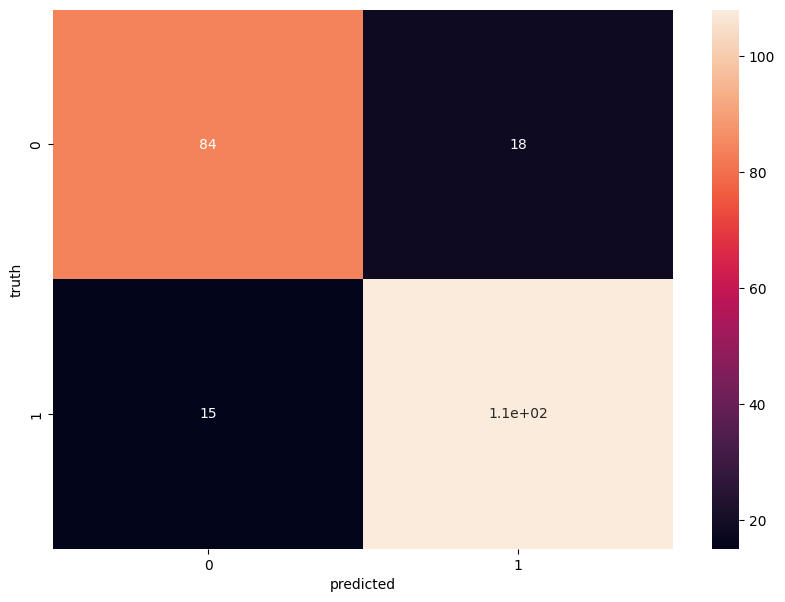

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')